In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
df = pd. read_csv('heart_disease_data.csv')

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [34]:
df.shape

(303, 14)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

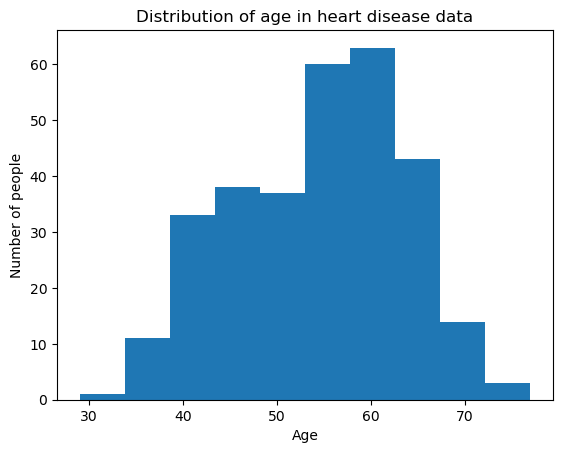

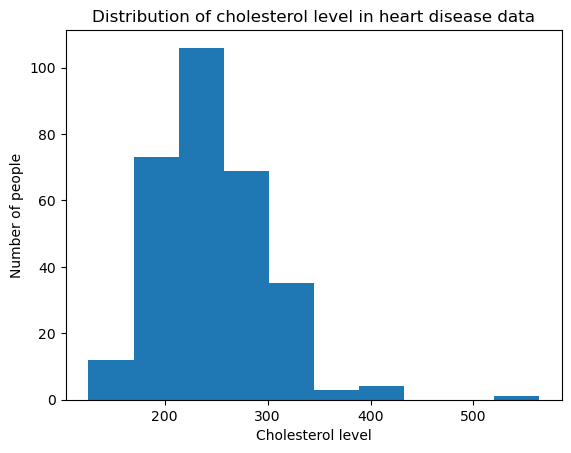

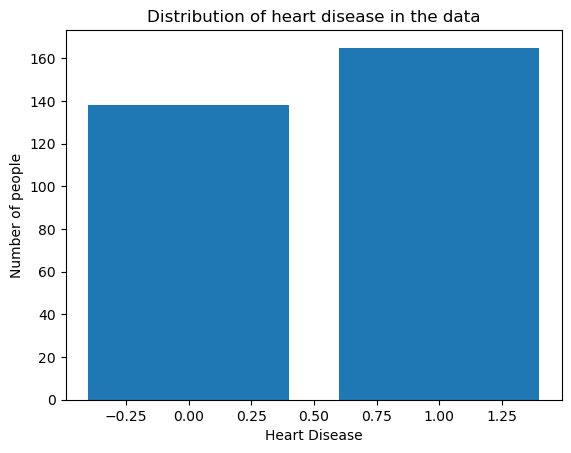

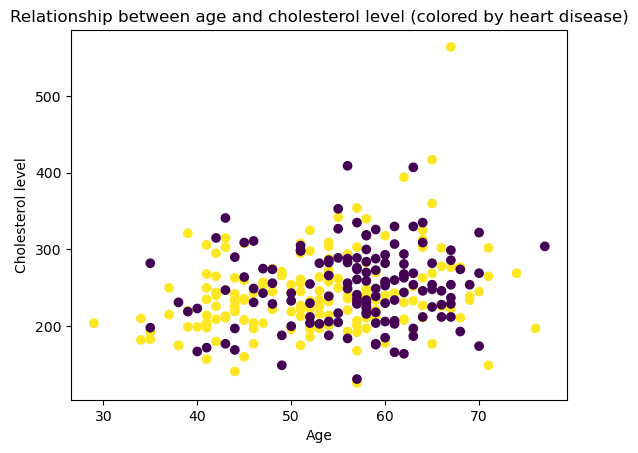

In [11]:
import matplotlib.pyplot as plt

# Explore data distribution
# Age
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Distribution of age in heart disease data')
plt.show()

# Cholesterol
plt.hist(df['chol'])
plt.xlabel('Cholesterol level')
plt.ylabel('Number of people')
plt.title('Distribution of cholesterol level in heart disease data')
plt.show()

# Target variable (Heart disease) - bar chart
plt.bar(df['target'].value_counts().index, df['target'].value_counts().values)
plt.xlabel('Heart Disease')
plt.ylabel('Number of people')
plt.title('Distribution of heart disease in the data')
plt.show()

# Relationship between features (scatter plot example)
plt.scatter(df['age'], df['chol'], c=df['target'])
plt.xlabel('Age')
plt.ylabel('Cholesterol level')
plt.title('Relationship between age and cholesterol level (colored by heart disease)')
plt.show()

# Customize these examples to explore other features and relationships!

In [12]:
x = df.drop(columns='target',axis=1)

In [13]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
y = df['target']

In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y,random_state=23)

In [17]:
print(x_test.shape, x_train.shape)

(61, 13) (242, 13)


In [18]:
model = LogisticRegression()

In [19]:
model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = model.predict(x_test)

In [21]:
y_train

61     1
83     1
103    1
160    1
119    1
      ..
251    0
167    0
201    0
281    0
79     1
Name: target, Length: 242, dtype: int64

In [22]:
score = accuracy_score(y_test,y_pred)

In [23]:
print("The accuracy score is ",score)

The accuracy score is  0.8524590163934426


In [37]:
# User input for each feature
user_data = []
features = ['age', 'sex(1 for male/ 0 for female)', 'chestpain type (typical angina[1]/atypical angina[0])', 'resting bp (110 to 180)', 'cholestrol (200-350)', 'fasting bp (>120[1]/[0])', 'rest electrocardiogram (normal[0]/abnormal[1])', 'max. heart rate', 'excercise induced angina (1[yes]/0[no])', 'oldpeak(1-7)', 'slope(0-2)', 'number of major vessels(0-3)', 'thalium stress test results(0-3)']  # Replace with your actual feature names
for feature in features:
    while True:
        try:
            value = float(input(f"Enter your {feature} value: "))
            user_data.append(value)
            break  # Exit the loop after successful input
        except ValueError:
            print("Invalid input. Please enter a numerical value.")

# Prediction based on user input
user_data = np.array([user_data]).reshape(1, -1)  # Reshape to 2D array for prediction
prediction = model.predict(user_data)

# Interpret prediction and provide informative output
if prediction == 1:
    print("**Warning:** Based on your input, you may be at higher risk for heart disease.")
    print("It is crucial to consult a doctor for a comprehensive assessment and personalized recommendations.")
else:
    print("Based on your input, your risk of heart disease appears to be lower.")
    print("However, this is not a substitute for professional medical advice. Regular checkups and a healthy lifestyle are still important.")


Enter your age value: 27
Enter your sex(1 for male/ 0 for female) value: 1
Enter your chestpain type (typical angina[1]/atypical angina[0]) value: 1
Enter your resting bp (110 to 180) value: 120
Enter your cholestrol (200-350) value: 250
Enter your fasting bp (>120[1]/[0]) value: 135
Enter your rest electrocardiogram (normal[0]/abnormal[1]) value: 0
Enter your max. heart rate value: 90
Enter your excercise induced angina (1[yes]/0[no]) value: 0
Enter your oldpeak(1-7) value: 6
Enter your slope(0-2) value: 0.25
Enter your number of major vessels(0-3) value: 2.34
Enter your thalium stress test results(0-3) value: 2
Based on your input, your risk of heart disease appears to be lower.
However, this is not a substitute for professional medical advice. Regular checkups and a healthy lifestyle are still important.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
